In [9]:
!pip install numpy
!pip install matplotlib

In [10]:
import math

def sigmoid(x):
    if x < -700:
        return 0
    elif x >= 700:
        return 1
    return 1 / (1 + math.exp(-x))

def cross_entropy(y, y_hat):
    return y * np.log(y_hat) - (1-y)*np.log(1-y_hat)

def derivate(weights, y, x1, x2):
    w1,w2,b = weights
    dw1 = (x1 -2*x1*y) / (1 + np.exp(b + w1*x1 + w2*x2) ) + x1*y
    dw2 = (x2 -2*x2*y) / (1 + np.exp(b + w1*x1 + w2*x2) ) + x2*y
    db = (1 -2*y) / (1 + np.exp(b + w1*x1 + w2*x2) ) + y
    return np.array([dw1, dw2, db])
    
def perceptron(x1, x2, weights, activation_func=sigmoid):
    return activation_func(x1 * weights[0] + x2 + weights[1] + weights[2])

def backpropagation(weights, y, x1, x2):
    #print(weights, derivate(weights, y, x1, x2))
    new_weights = np.add(weights, 0.001*derivate(weights, y, x1, x2))
    return new_weights

def step(x, t=0.4):
    if x>=t:
        return 1
    return 0
#Return the estimation y_hat and the new_weights 
def iteration(weights, y, x1, x2):
    return  step(perceptron(x1,x2, weights)), backpropagation(weights, y, x1, x2)

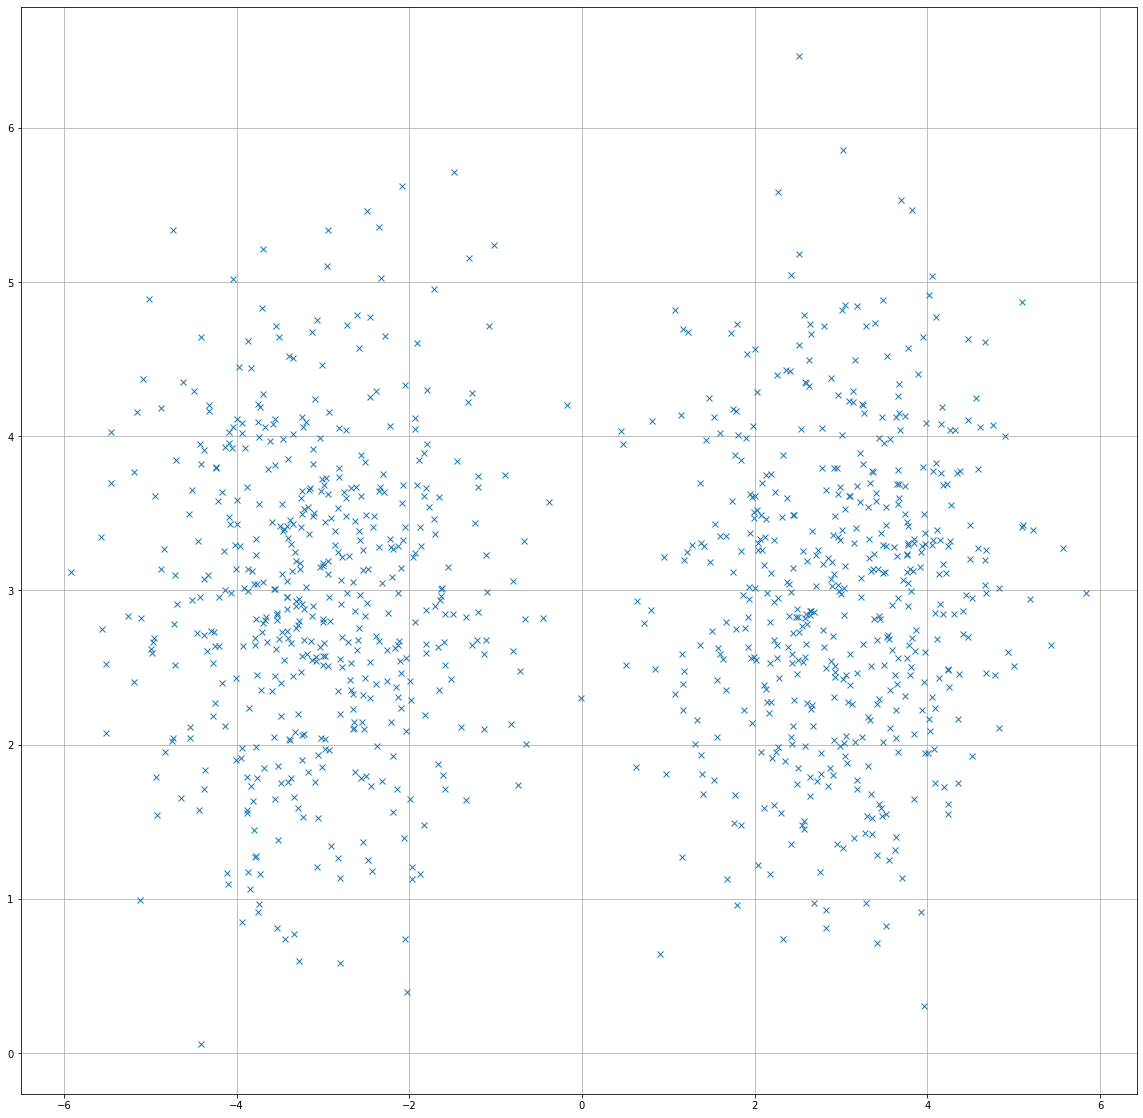

In [29]:
import numpy as np
import matplotlib.pyplot as plt

mu = 3; size = 1000;
#Generate x and label
x = np.concatenate((np.random.normal(mu, 1, int(size/2)), np.random.normal(-mu, 1, int(size/2))))
y = np.concatenate( (np.zeros((int(size/2), 1)), np.ones((int(size/2), 1))) ) 

#Shuffle label and x the same way
randomize = np.arange(len(x))
np.random.shuffle(randomize)
x1 = x[randomize]
y = y[randomize]

#generate Y
x2 = np.random.normal(mu,1, size)

plt.figure(figsize=(20,20))
plt.plot(x1,x2, 'x')
plt.grid()
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


[-121.00137463  164.02339075   58.43329641]
0.068


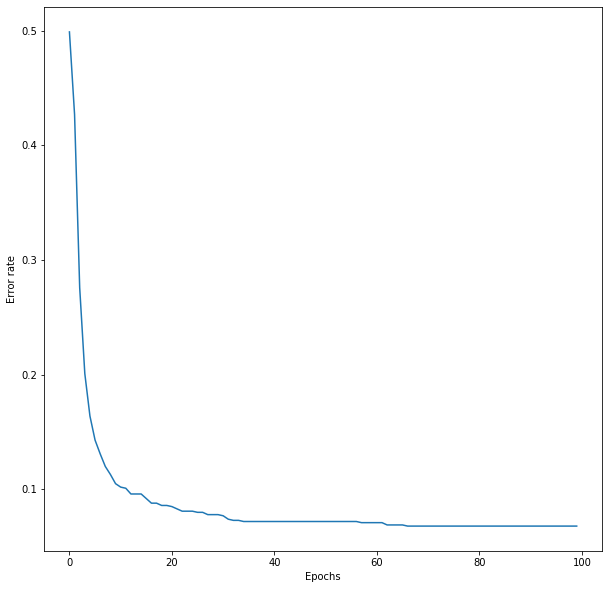

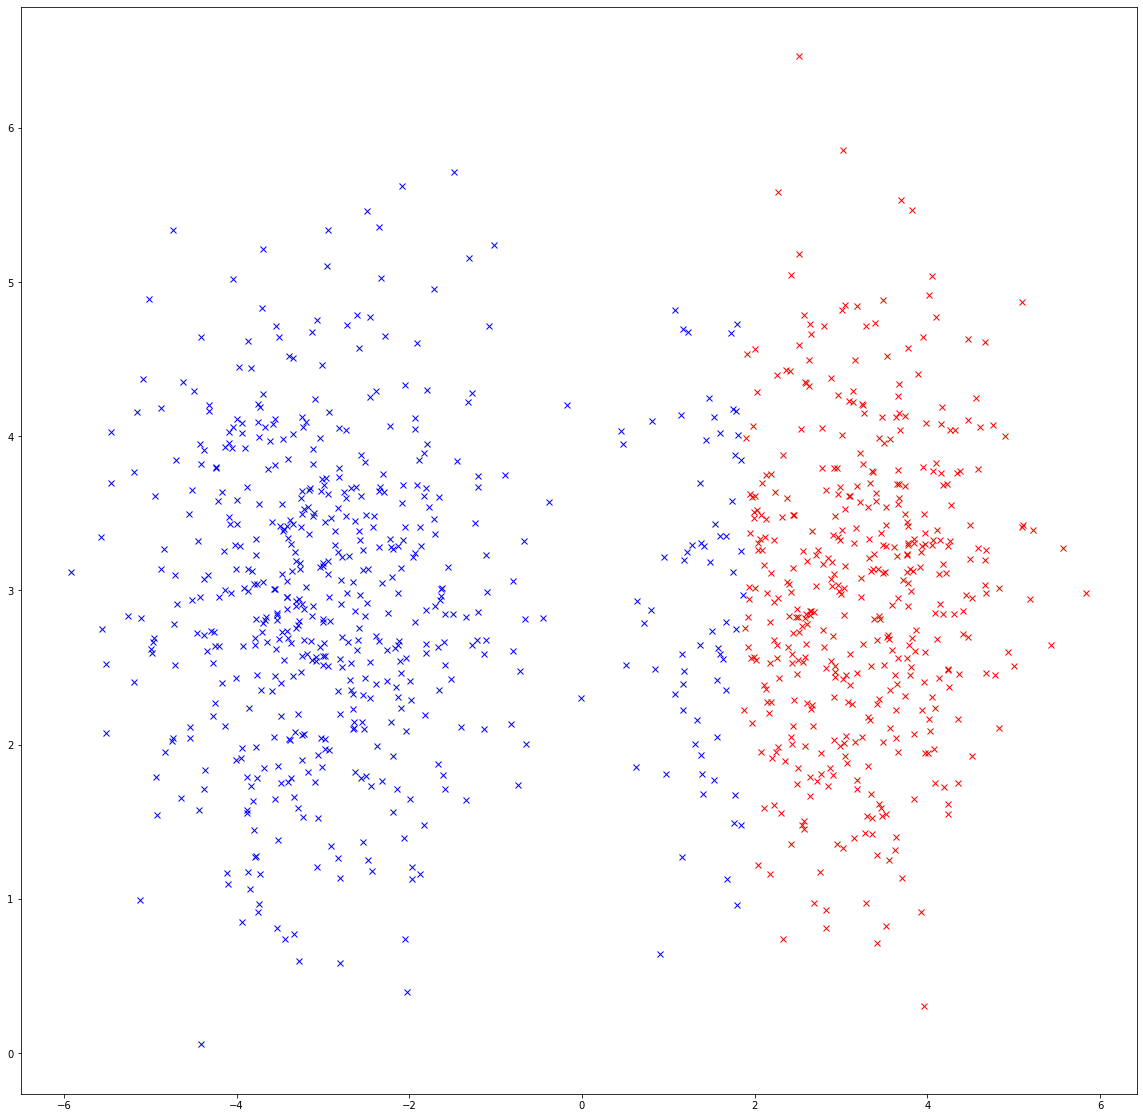

In [34]:
#INIT
init = 1e-10
weights = np.array([init, init, init])
y_hat = []
errors = []
nb_epoch = 100
for epoch in range(nb_epoch):
    #print('epoch = '+str(epoch) + '\r')
    cpt = 0
    y_hat = []
    for i in range(len(x1)):
        y_hat_temp, weights = iteration(weights, y[i,0], x1[i], x2[i])
        y_hat.append(y_hat_temp)

    for i in range(len(y)):
        if y[i,0]!=y_hat[i]:
            cpt+=1
    errors.append(cpt/len(x1))
    
plt.figure(figsize=(10,10))
r = [i for i in range(nb_epoch)]
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.plot(r,errors)

print(weights)
print(errors[-1])

good_class = []; bad_class = [];
"""
#Display misclassfication
for i in range(len(y_hat)):
    if y[i,0] == y_hat[i]:
        good_class.append(i)
    else:
        bad_class.append(i)
"""
for i in range(len(y_hat)):
    if y_hat[i] == 1:
        good_class.append(i)
    else:
        bad_class.append(i)
        

plt.figure(figsize=(20,20))
plt.plot(x1[good_class],x2[good_class], 'xb')
plt.plot(x1[bad_class],x2[bad_class], 'xr')
plt.show()